In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Readme
Change dataset, crop_id, obj_id only

# 1. Crop images

In [9]:
import glob
from src.model.cnos_foundpose import cnos_foundpose, cnos_different_thresholds


dataset = "daoliuzhao"
scene_id = 0
obj_id = 1
rgb_paths = sorted(glob.glob(f"datasets/bop23_challenge/datasets/{dataset}/test/{scene_id:06d}/rgb/*.png"))

In [11]:
from tqdm import trange

# for i in trange(len(rgb_paths)):
for i in trange(3,4):
    scene_id = int(rgb_paths[i].split("/")[-3])
    frame_id = int(rgb_paths[i].split("/")[-1].split(".")[0])
    print(rgb_paths[i])
    cnos_foundpose(rgb_path=rgb_paths[i], scene_id=scene_id, frame_id=frame_id, obj_id=obj_id, dataset=dataset)
    # cnos_different_thresholds(rgb_path=rgb_paths[i], custom_sam_model=custom_sam_model, scene_id=scene_id, frame_id=frame_id, obj_id=obj_id, dataset=dataset)

  0%|          | 0/1 [00:00<?, ?it/s]

datasets/bop23_challenge/datasets/daoliuzhao/test/000000/rgb/000003.png
Number of sam proposals before removing all small proposals 115
Number of sam proposals after removing all small proposals 69


Using cache found in /home/cuong.van-dam/.cache/torch/hub/facebookresearch_dinov2_main
/home/cuong.van-dam/CuongVanDam/do_an_tot_nghiep/cnos/src/model/constrastive_learning_utils.py:383: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  scaled_image = F.interpolate(torch.tensor(image).unsqueeze(0), scale_factor=scale_factor.item())[0] # unsqueeze at  0 - B,C, H, W
/home/cuong.van-dam/CuongVanDam/do_an_tot_nghiep/cnos/src/model/constrastive_learning_utils.py:383: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  scaled_image = F.interpolate(torch.tensor(image).unsqueeze(0), scale_factor=scale_factor.item())[0] # unsqueeze at  0 - B,C, H, W
100%|██████████| 69/69 [00:12<00:00,  5.60it/s]


Cnos selected proposals: 69
Number of proposals before nms as number of selected proposals 69
Number of proposals after nms as final : 57
File cnos_foundpose_analysis/daoliuzhao/output_npz/000000_000003_cnos.json does not exist.
File cnos_foundpose_analysis/daoliuzhao/output_npz/000000_000003_cnos.npz has been deleted.


100%|██████████| 1/1 [06:43<00:00, 403.35s/it]


In [7]:
from src.model.utils import convert_npz_to_json_2
import glob
import os
from functools import partial
import multiprocessing
import os.path as osp
import logging
from tqdm import tqdm
import time
import json

result_paths = sorted(
    glob.glob(
        osp.join("datasets/bop23_challenge/results/cnos_exps/predictions/daoliuzhao/CustomSamAutomaticMaskGenerator_template_pbr0_aggavg_5_daoliuzhao/scene000000_*.npz",
        )
    )
)

result_paths = sorted(
    [path for path in result_paths if "runtime" not in path]
)
num_workers = 10
logging.info(f"Converting npz to json requires {num_workers} workers ...")
pool = multiprocessing.Pool(processes=num_workers)
convert_npz_to_json_with_idx = partial(
    convert_npz_to_json_2,
    list_npz_paths=result_paths,
)
detections = list(
    tqdm(
        pool.imap_unordered(
            convert_npz_to_json_with_idx, range(len(result_paths))
        ),
        total=len(result_paths),
        desc="Converting npz to json",
    )
)
formatted_detections = []
for detection in tqdm(detections, desc="Loading results ..."):
    formatted_detections.extend(detection)

detections_path = f"contrastive_learning/output_json/icbin_ob1_contrastive_learning.json"
with open(detections_path, "w") as f:
    json.dump(formatted_detections, f)
logging.info(f"Saved predictions to {detections_path}")

Loading results ...: 100%|██████████| 50/50 [00:00<00:00, 166970.70it/s]


In [ ]:
import numpy as np

x = np.load("cnos_foundpose_analysis/icbin/output_npz/000001_000000_cnos.npz")
x["score"]

In [5]:
# i = 2
# scene_id = int(rgb_paths[i].split("/")[-3])
# frame_id = int(rgb_paths[i].split("/")[-1].split(".")[0])
# cnos_foundpose(rgb_path=rgb_paths[i], scene_id=scene_id, frame_id=frame_id, obj_id=obj_id, dataset=dataset)

In [6]:
# from src.model.sam import CustomSamAutomaticMaskGenerator, load_sam

# def _move_to_device(segmentor_model, device="cuda"):
#     # if there is predictor in the model, move it to device
#     if hasattr(segmentor_model, "predictor"):
#         segmentor_model.predictor.model = (
#             segmentor_model.predictor.model.to(device)
#         )
#     else:
#         segmentor_model.model.setup_model(device=device, verbose=True)

# model_type = "vit_h"
# checkpoint_dir =  "datasets/bop23_challenge/pretrained/segment-anything"
# sam_model = load_sam(model_type, checkpoint_dir)
# custom_sam_model = CustomSamAutomaticMaskGenerator(sam=sam_model) 

# _move_to_device(custom_sam_model)

# Test on single crops

datasets/bop23_challenge/datasets/icbin/test/000001/rgb/000000.png


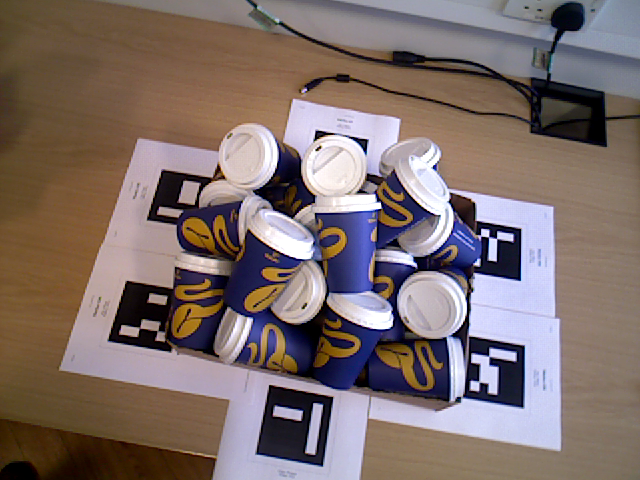

In [9]:
import glob
from src.model.cnos_foundpose import foundpose
from PIL import Image

idx  = 0
print(rgb_paths[idx])
Image.open(rgb_paths[idx])

In [12]:
scene_id = int(rgb_paths[idx].split("/")[-3])
frame_id = int(rgb_paths[idx].split("/")[-1].split(".")[0])
score_dict = foundpose(rgb_path=rgb_paths[idx], custom_sam_model=custom_sam_model, scene_id=scene_id, frame_id=frame_id, obj_id=obj_id, dataset=dataset)

Using cache found in /home/cuong.van-dam/.cache/torch/hub/facebookresearch_dinov2_main
[2024-09-04 23:26:24,180] [INFO] dinov2: using MLP layer as FFN
/home/cuong.van-dam/CuongVanDam/do_an_tot_nghiep/cnos/src/model/constrastive_learning.py:265: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  scaled_image = F.interpolate(torch.tensor(image).unsqueeze(0), scale_factor=scale_factor.item())[0] # unsqueeze at  0 - B,C, H, W
  0%|          | 0/103 [00:00<?, ?it/s]WARNING clustering 78366 points to 2048 centroids: please provide at least 79872 training points


Clustering 78366 points in 256D to 2048 clusters, redo 1 times, 20 iterations
  Preprocessing in 0.01 s
  Iteration 19 (0.24 s, search 0.21 s): objective=9.73319e+07 imbalance=1.123 nsplit=0       


  1%|          | 1/103 [00:03<05:37,  3.31s/it]WARNING clustering 78366 points to 2048 centroids: please provide at least 79872 training points


Clustering 78366 points in 256D to 2048 clusters, redo 1 times, 20 iterations
  Preprocessing in 0.01 s
  Iteration 19 (0.26 s, search 0.21 s): objective=9.73315e+07 imbalance=1.123 nsplit=0       


  2%|▏         | 2/103 [00:07<06:14,  3.71s/it]WARNING clustering 78366 points to 2048 centroids: please provide at least 79872 training points


Clustering 78366 points in 256D to 2048 clusters, redo 1 times, 20 iterations
  Preprocessing in 0.01 s
  Iteration 19 (0.28 s, search 0.21 s): objective=9.72873e+07 imbalance=1.123 nsplit=0       


  3%|▎         | 3/103 [00:10<06:09,  3.69s/it]WARNING clustering 78366 points to 2048 centroids: please provide at least 79872 training points


Clustering 78366 points in 256D to 2048 clusters, redo 1 times, 20 iterations
  Preprocessing in 0.01 s
  Iteration 19 (0.26 s, search 0.21 s): objective=9.73612e+07 imbalance=1.124 nsplit=0       


  4%|▍         | 4/103 [00:14<05:54,  3.58s/it]WARNING clustering 78366 points to 2048 centroids: please provide at least 79872 training points


Clustering 78366 points in 256D to 2048 clusters, redo 1 times, 20 iterations
  Preprocessing in 0.01 s
  Iteration 19 (0.27 s, search 0.21 s): objective=9.73788e+07 imbalance=1.125 nsplit=0       


  5%|▍         | 5/103 [00:17<05:49,  3.56s/it]WARNING clustering 78366 points to 2048 centroids: please provide at least 79872 training points


Clustering 78366 points in 256D to 2048 clusters, redo 1 times, 20 iterations
  Preprocessing in 0.01 s
  Iteration 19 (0.26 s, search 0.20 s): objective=9.73461e+07 imbalance=1.125 nsplit=0       


  6%|▌         | 6/103 [00:21<05:41,  3.52s/it]WARNING clustering 78366 points to 2048 centroids: please provide at least 79872 training points


Clustering 78366 points in 256D to 2048 clusters, redo 1 times, 20 iterations
  Preprocessing in 0.01 s
  Iteration 19 (0.28 s, search 0.21 s): objective=9.74136e+07 imbalance=1.125 nsplit=0       


  7%|▋         | 7/103 [00:24<05:34,  3.48s/it]WARNING clustering 78366 points to 2048 centroids: please provide at least 79872 training points


Clustering 78366 points in 256D to 2048 clusters, redo 1 times, 20 iterations
  Preprocessing in 0.01 s
  Iteration 19 (0.29 s, search 0.20 s): objective=9.73759e+07 imbalance=1.122 nsplit=0       


  8%|▊         | 8/103 [00:28<05:40,  3.58s/it]


KeyboardInterrupt: 